# Исследование объявлений о продаже квартир

**Исходные данные:**

Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет.

В архиве представлены данные двух видов:
- добавленные пользователями;
- полученные автоматически на основе картографических данных.

**Цель работы:** 

На основании архива проанализировать стоимость объектов недвижимости и зависимость стоимости квартир от различных факторов. 

**План исследования:**
1. Выполнить предобработку данных.
2. Выявить и устранить аномалии в данных. 
3. Провести исследовательский анализ данных. 
4. Выявить как быстро продавались квартиры.
5. Определить факторы, которые больше всего влияют на стоимость квартир. 
6. Выявить среднюю цену квадратного метра. 
7. Выявить зависимость (или ее отсутствие) стоимости квартир от их удаления от центра Санкт-Петербурга. 

### Откройте файл с данными и изучите общую информацию

In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [2]:
# Открываем файл, после первого ознакомления с данными добавляем корректный разделитель
data = pd.read_csv('datasets/real_estate_data.csv', sep="\t")

# Выведем на экран 10 строк для анализа
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# Выведем основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

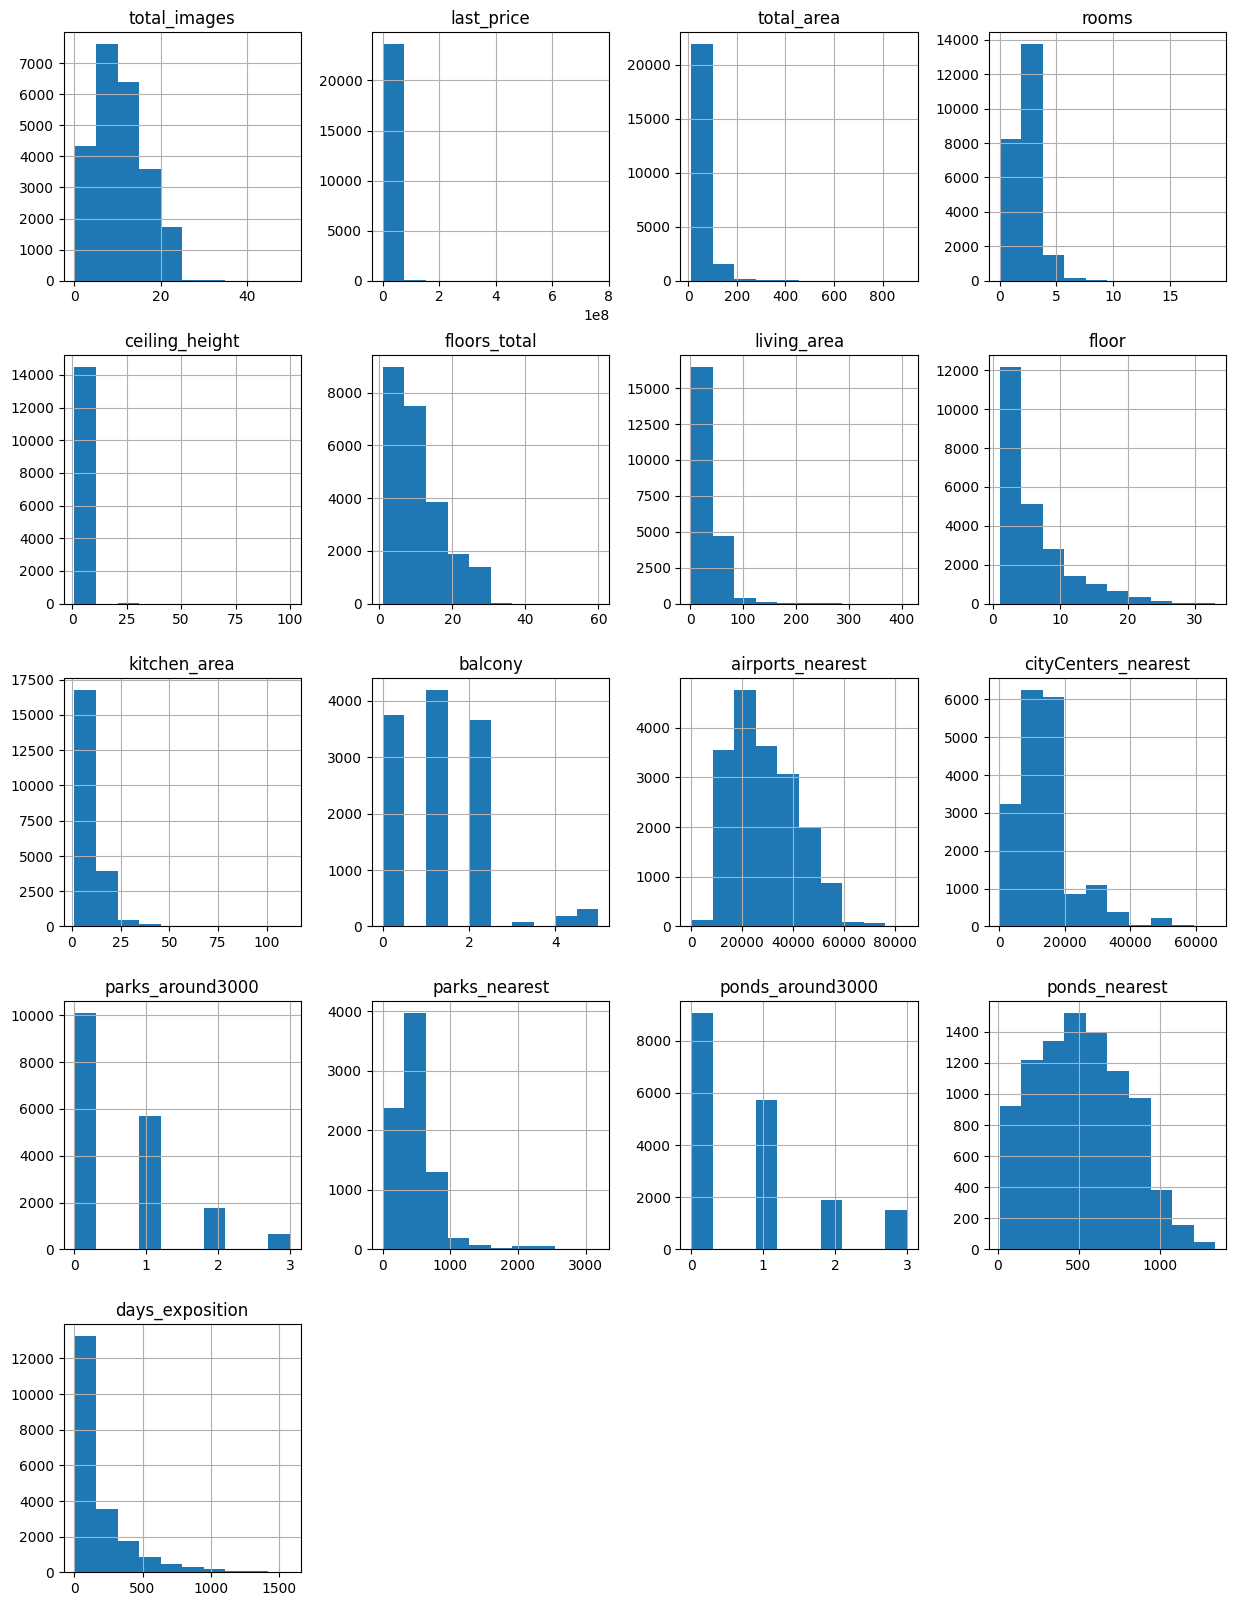

In [4]:
# Построим гистограмму для всех числовых столбцов таблицы на одном графике
data.hist(figsize=(15, 20));

После первичного ознакомления с данными можно сделать следующие выводы: 

1. В некоторых столбцах присутствуют пропуски данных. Нужно будет разобраться с чем они связаны и скорректировать где это возможно. 
2. На основании гистограмм можно заметить подозрительные значения в столбцах (например, столбец ceiling_height (есть объекты с потолками около 25 м)). Нужно будет внимательно изучить столбцы с числовыми значениями и проверить наличие аномалий, ошибок в данных.
3. Общая "картина" на основании необработанных данных следующая - для большинства квартир характерны:
- общая стоимость до 50 000 000
- общая площадь до 100 кв.м
- 3 комнаты
- первые этажи
- аэропорт и центр города в пределах 20 км
- отсутствие прудов и парков в ближайших 3 км
- закрытие объявления в течении 100 дней

Проверим, так ли это на самом деле.

### Выполните предобработку данных

In [5]:
# Переименуем столбцы
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

#### Работа с пропусками

In [6]:
# Определим в каких столбцах есть пропуски
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
ponds_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
total_images                0
studio                      0
floor                       0
open_plan                   0
dtype: int64

In [7]:
# Найдем доли пропущенных значений к общему числу значений в каждом столбце
data.isna().mean().sort_values(ascending=False)*100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
ponds_around_3000       23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
total_images             0.000000
studio                   0.000000
floor                    0.000000
open_plan                0.000000
dtype: float64

Выявлены пропуски в следующих столбцах:
- ceiling_height - высота потолков
- balcony - число балконов
- locality_name - название населённого пункта
- kitchen_area - площадь кухни в квадратных метрах
- living_area - жилая площадь в квадратных метрах
- is_apartment - апартаменты
- days_exposition - сколько дней было размещено объявление (от публикации до снятия)
- floors_total - всего этажей в доме
- airports_nearest - расстояние до ближайшего аэропорта в метрах
- city_centers_nearest - расстояние до центра города 
- parks_around3000 - число парков в радиусе 3 км   
- parks_nearest - расстояние до ближайшего парка    
- ponds_around3000 - число водоёмов в радиусе 3 км
- ponds_nearest - расстояние до ближайшего водоёма

**ceiling_height**

Высоту потолков могли не указывать, если не обладали этой информацией. 

Заменим медианным значением.

In [8]:
# Найдем медианное значение высоты потолков и заменим NaN значения
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

**balcony**

Вероятнее всего число балконов не указывали те, у кого балконы отсутствуют. 

Заменим значения NaN на 0. 

In [9]:
# Заполним количество
data['balcony'] = data['balcony'].fillna(0)

**locality_name**

Пропуск указания населенного пункта больше похож на техническую ошибку при выгрузке данных, неправильный запрос к БД при объединении таблиц. 

Учитывая количество пропущенных значений, их влияние кажется минимальным. Удалим строки, в которых название населенного пункта не указано.

In [10]:
# Удаляем строки, где locality_name пропущен
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

**kitchen_area**

Эти значения могли остаться не заполненными т.к., вероятно, поле было не обязательно для заполнения и:
- у человека могла отсутствовать информация о точном значении площади
- или площадь кухни не указывалась для студий или открытый планировок

Заполним пропущенные значения, там где это возможно, путем нахождения разницы между столбцами total_area и living_area.

Остальные значения оставим пропущенными.

In [11]:
# Проверим верна ли гипотеза про студии и открытые планировки
print(data.groupby('studio')['kitchen_area'].count())
data.groupby('open_plan')['kitchen_area'].count()

studio
False    21381
True         0
Name: kitchen_area, dtype: int64


open_plan
False    21381
True         0
Name: kitchen_area, dtype: int64

In [12]:
# Заполним kitchen_area путем нахождения разницы между total_area и living_area
data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = data['total_area'] - data['living_area']

**living_area**

Эти значения могли остаться не заполненными, т.к., вероятно, поле было не обязательно для заполнения, и у человека отсутствовала информации о точном значении площади.

Заполним пропущенные значения, там где это возможно, путем нахождения разницы между столбцами total_area и living_area.


In [13]:
# Заполним living_area путем нахождения разницы между total_area и kitchen_area
data.loc[(data['living_area'].isna()), 'living_area'] = data['total_area'] - data['kitchen_area']


<!-- Для остальных пропущенных значений сгруппируем данные по количеству комнат на объекте, найдем медианное значение для каждой группы и заполним пропуски. Для этого создадим функцию. -->

Проверим везде ли total_area больше суммы площадей kitchen_area и living_area.

После этого для остальных пропущенных значений сгруппируем данные по количеству комнат на объекте, найдем медианное значение для каждой группы и заполним пропуски. Для этого создадим функцию.

И снова проверим везде ли total_area больше суммы площадей kitchen_area и living_area. После этого посчитаем как сильно могут повлиять некорректные строки на данные. Удалим их.


In [14]:
# Проверим встречаются ли строки, в которых сумма kitchen_area и living_area больше столбца total_area
(data['living_area'] + data['kitchen_area'] > data['total_area']).sum()

np.int64(68)

In [15]:
# Создадим функцию, которая будет группировать значения по определенному столбцу, находить медиану и заполнять им пропущенное значение
def fill_nan(data, group, nan):
    try:
        for i in data[group].unique():
            if data.loc[(data[group] == i), nan].count() > 0:
                data.loc[(data[group] == i) & (data[nan].isna()), nan] = \
                data.loc[(data[group] == i), nan].median()
    except Exception as e:
        print(e)
    finally:
        return data

In [16]:
# Для остальных пропущенных значений заменим на медианные сгруппированные по количеству комнат
data = fill_nan(data, 'rooms', 'living_area')

In [17]:
# Проверим увеличилось ли количество строк, в которых сумма kitchen_area и living_area больше столбца total_area
(data['living_area'] + data['kitchen_area'] > data['total_area']).mean()*100

np.float64(0.28752642706131076)

In [18]:
# Удалим строки с некорректными данными
data = data.drop(data[data['living_area'] + data['kitchen_area'] > data['total_area']].index)

**is_apartment**

Вероятнее всего это поле не заполняли владельцы квартир. Понятие апартаментов стало популярным относительно недавно, люди могли просто не задумываться, что этот параметр имеет значение у покупателей недвижимости.

Обычно стоимость апартаментов и квартир отличается, чтобы убедиться, что наше предположение верно, проверим медианную стоимость недвижимости, для которой есть пропуски в столбце is_apartment. И сравним это значение с медианной стоимостью и квартир и апартаментов. 

Заменим пропущенные значения на 0.

In [19]:
print(data.groupby('is_apartment')['last_price'].median())
print(data[data['is_apartment'].isna()]['last_price'].median())

data['is_apartment'] = data['is_apartment'].fillna(0)

is_apartment
False    4700000.0
True     6900000.0
Name: last_price, dtype: float64
4600000.0


**days_exposition**

Количество дней, в течении которых было размещено объявление, может быть не заполнено т.к. в этом поле идет подсчет дней со дня публикации до снятия объявления. Т.е. если объявление не снято с публикации, то и значения может не быть. 

Оставим пропущенные значения.


**floors_total**

Этажность дома могли не заполнять при создании объявления, либо могла возникнуть ошибка при сборе данных, выгрузке из БД. 

Сгруппируем объекты по их этажности и заменим пропущенные значения медианными (таким образом значения floors_total точно не будут меньше, чем floors).

In [20]:
data = fill_nan(data, 'floor', 'floors_total')

**airports_nearest**

Расстояние до аэропорта могло не рассчитаться для тех населенных пунктов, для которых расстояние до аэропорта слишком далеко. 

Попробуем заменить значения на медианные в соответствии с названием населенного пункта. Оставшиеся значения оставим пропущенными. 


In [21]:
data = fill_nan(data, 'locality_name', 'airports_nearest')

**city_centers_nearest**

Расстояние до центра города могло не рассчитываться для небольших населенных пунктов (где эта информация не актуальна).

Также расстояние могло не рассчитаться, если в объявлении не был указан точный адрес. 

Попробуем заменить значения на медианные в соответствии с названием населенного пункта. Оставшиеся значения оставим пропущенными. 

In [22]:
data = fill_nan(data, 'locality_name', 'city_centers_nearest')

После обработки данных в столбцах airports_nearest и city_centers_nearest можно заметить, что количество пропущенных значений в них стало одинаковым. 
Заменять значения на 0 кажется не совсем верным, поэтому оставим пропуски как есть.

In [23]:
data[data['city_centers_nearest'].isna()]['airports_nearest'].count()

np.int64(0)

**parks_around3000, ponds_around3000**

В небольших населенных пунктах вероятность наличия парка или пруда - не высокая. Наличие парка в окрестности 3км для крупных городов также не обязательно. 

Также расстояние могло не рассчитаться, если в объявлении не был указан точный адрес. 

Заменим пропуски нулевыми значениями.  

In [24]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

**parks_nearest, ponds_nearest**

Расстояние могло не рассчитаться, если в объявлении не был указан точный адрес. 

Изменять значение на 0 кажется неверным, поэтому оставим пропуски как есть.

После всех произведенных замен в следующих столбцах остались пропущенные значения: 
- kitchen_area - для квартир со свободной планировкой и студий
- days_exposition - для незакрытых на момент сбора данных объявлений
- airports_nearest - для объектов, которые далеко от аэропорта (предположительно)
- cityCenters_nearest - для объектов, которые далеко от центра города (предположительно)
- parks_nearest - для объектов, рядом с которыми нет парков
- ponds_neares - для объектов, рядом с которыми нет прудов


In [25]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1460
balcony                     0
locality_name               0
airports_nearest         5366
city_centers_nearest     5366
parks_around_3000           0
parks_nearest           15538
ponds_around_3000           0
ponds_nearest           14518
days_exposition          3172
dtype: int64

#### Корректировка типов данных

In [26]:
# Скорректируем типы данных в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23582 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23582 non-null  int64  
 1   last_price            23582 non-null  float64
 2   total_area            23582 non-null  float64
 3   first_day_exposition  23582 non-null  object 
 4   rooms                 23582 non-null  int64  
 5   ceiling_height        23582 non-null  float64
 6   floors_total          23582 non-null  float64
 7   living_area           23582 non-null  float64
 8   floor                 23582 non-null  int64  
 9   is_apartment          23582 non-null  object 
 10  studio                23582 non-null  bool   
 11  open_plan             23582 non-null  bool   
 12  kitchen_area          22122 non-null  float64
 13  balcony               23582 non-null  float64
 14  locality_name         23582 non-null  object 
 15  airports_nearest      18

In [27]:
# данные в first_day_exposition можно нужно к типу дата-время и вынести их в отдельных столбец
data['first_day_exposition_datetime'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# данные в is_apartment приведем к булевому типу (т.к. в нем хранятся значения True/False)
data['is_apartment'] = data['is_apartment'].astype('bool')

# данные в balcony приведем к целочисленному типу (т.к. количество балконов не может быть нецелым числом)
data['balcony'] = data['balcony'].astype('int64')

# данные в floors_total можно привести к целочисленному типу (т.к. количество этажей не может быть нецелым числом)
data['floors_total'] = data['floors_total'].astype('int64')

# данные в parks_around3000 и ponds_around3000 приведем к целочисленному типу (т.к. количество парков и прудов не может быть нецелым числом)
data['parks_around3000'] = data['parks_around_3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around_3000'].astype('int64')

# данные в days_exposition можно привести к целочисленному типу (т.к. в столбце хранится количество дней)
# т.к. в столбце есть пропуски данных, используем конструкцию try/except
try:
    data['days_exposition'] = data['days_exposition'].astype('int64')
except:
    pass

#### Устранение дубликатов

In [28]:
# проверим количество дубликатов
data.duplicated().sum()

np.int64(0)

In [29]:
# Выведем уникальные названия населенных пунктов.
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [30]:
# Удаляем дубликаты
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].replace('Мурино', 'поселок Мурино')
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')

In [31]:
# Создадим функцию для корректировки названий населенных пунктов

def get_city_name(city_full_name):
    pattern = r'[А-Я]{1}[А-Яа-я0-9 -]+'
    city = re.search(pattern=pattern, string=city_full_name)
    return city.group(0)

data['locality_name'] = data['locality_name'].apply(get_city_name)

### Добавьте в таблицу новые столбцы

In [32]:
# Добавим столбец - цена одного квадратного метра
data['one_squere_meter_price'] = (data['last_price'] / data['total_area']).round(2)

# Добавим столбец - день недели публикации объявления
data['first_day_exposition_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

# Добавим столбец - месяц публикации объявления
data['first_day_exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month 

# Добавим столбец - год публикации объявления
data['first_day_exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year 

# Добавим столбец - расстояние до центра города в километрах
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()

In [33]:
# Добавим столбец - тип этажа квартиры (значения — «первый», «последний», «другой»)
def get_floor_category(row):
    floor = row['floor']
    total_floor = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == total_floor:
            return 'последний'
        else:
            return 'другой'
    except Exception as e:
        print(e)

data['floor_category'] = data.apply(get_floor_category, axis=1) 

### Проведите исследовательский анализ данных

**Общая площадь**

In [34]:
data['total_area'].describe()

count    23582.000000
mean        60.361185
std         35.694811
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

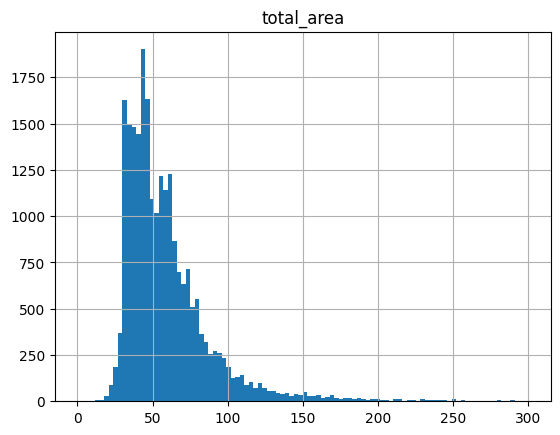

In [35]:
data.hist('total_area', bins = 100, range = (0, 300));

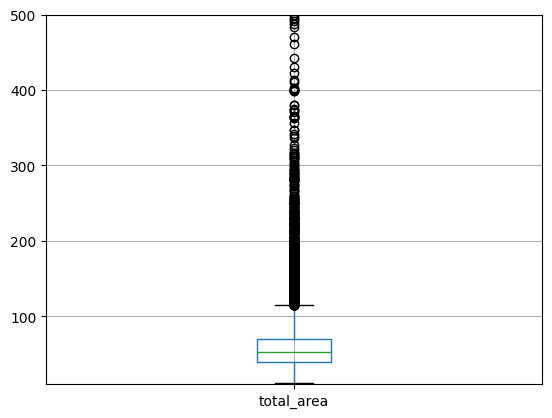

In [36]:
data.boxplot('total_area')
plt.ylim(10, 500);

In [37]:
data[data['total_area'] > 300][['locality_name', 'last_price', 'total_area']].sort_values(by='total_area', ascending=False).head(10)

,locality_name,last_price,total_area
19505,Санкт-Петербург,420000000.0,900.0
12840,Санкт-Петербург,140000000.0,631.2
3113,Санкт-Петербург,140000000.0,631.0
15626,Санкт-Петербург,300000000.0,618.0
5349,Санкт-Петербург,65000000.0,590.0
4230,Санкт-Петербург,50000000.0,517.0
8004,Санкт-Петербург,84000000.0,507.0
14991,Санкт-Петербург,150000000.0,500.0
5883,Санкт-Петербург,230000000.0,500.0
12382,Санкт-Петербург,91500000.0,495.0


In [38]:
data = data.query('total_area < 300')

Мы получили ожидаемое распределение.

Отсутствуют объекты с площадью ниже 0. 

Наиболее часто встречаются площади в диапазоне от 50 до 70 кв.м. 

Оставим в выборке только те строки, в которых площадь не превышает 300 кв.м.

**Жилая площадь**

In [39]:
data['living_area'].describe()

count    23519.000000
mean        34.258790
std         20.143696
min          2.000000
25%         18.500000
50%         30.300000
75%         42.900000
max        250.000000
Name: living_area, dtype: float64

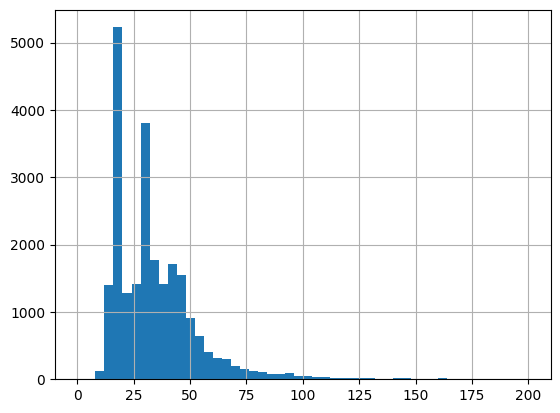

In [40]:
data['living_area'].hist(bins=50, range=(0, 200));

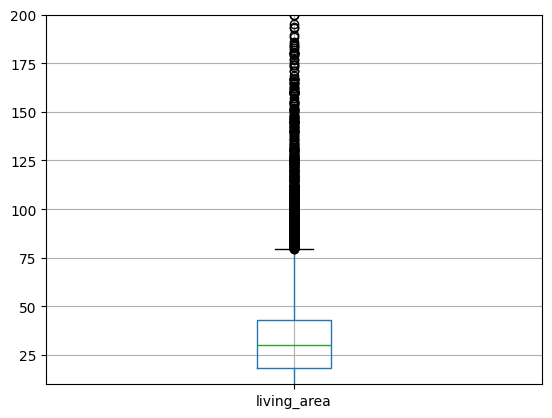

In [41]:
data.boxplot('living_area')
plt.ylim(10, 200);

In [42]:
data.sort_values('living_area')[['living_area', 'rooms', 'is_apartment', 'open_plan']].head(10)

,living_area,rooms,is_apartment,open_plan
21714,2.0,0,False,False
13892,2.0,2,False,False
23525,3.0,3,False,False
3238,3.0,1,False,False
17551,5.0,0,False,False
21898,5.4,4,False,False
16404,6.0,1,False,False
19216,6.5,1,False,False
23160,8.0,1,False,False
20954,8.0,2,False,False


In [43]:
data = data.query('living_area > 9')

Не похоже на нормальное распределение. 

Есть провал по частоте между практически минимальной площадью и средней. 

Можно увидеть, что в выборке есть значения жилой площади менее 9 кв.м (что противоречит нормам). Исключим площади меньше 9 кв.м. 

**Площадь кухни**

In [44]:
data['kitchen_area'].describe()

count    22045.000000
mean        10.752652
std          6.253931
min          0.000000
25%          7.000000
50%          9.200000
75%         12.000000
max        120.000000
Name: kitchen_area, dtype: float64

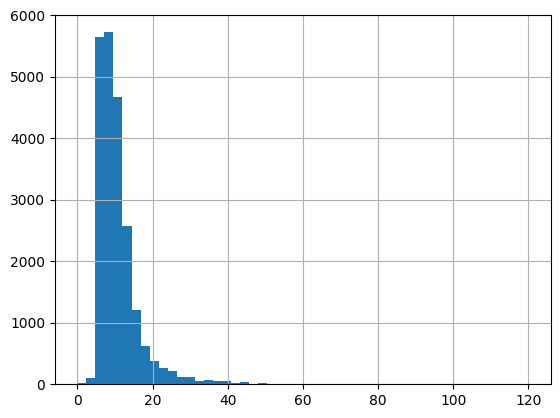

In [45]:
data['kitchen_area'].hist(bins=50, range=(0, 120));

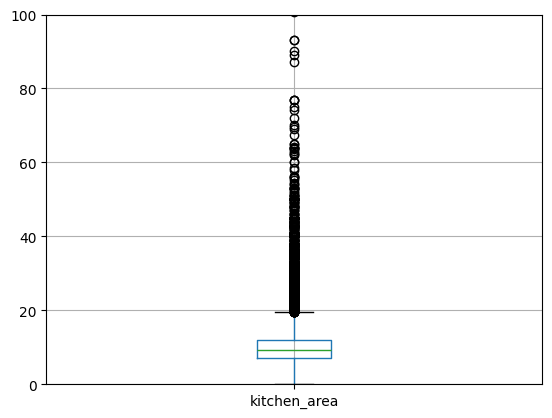

In [46]:
data.boxplot('kitchen_area')
plt.ylim(0, 100);

In [47]:
data = data.query('kitchen_area < 60')

Похоже на ожидаемое распределение. 

Больше всего объектов с кухнями около 10 кв.м. 

Но где-то встречаются и кухни площадью больше 40 кв.м. 

Объекты с площадью кухни больше 60 кв.м исключим из рассмотрения.

**Цена объекта**

In [48]:
data['last_price'].describe()

count    2.201300e+04
mean     6.255497e+06
std      7.527737e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

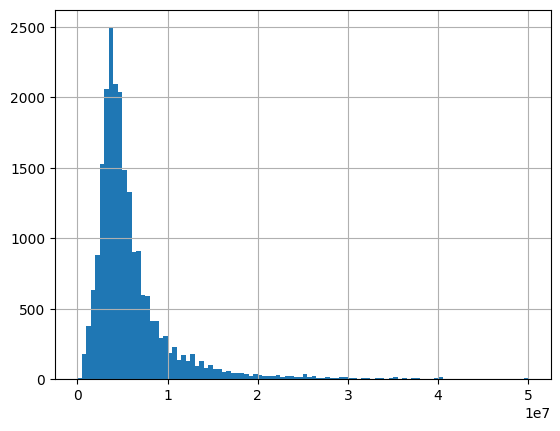

In [49]:
data['last_price'].hist(bins=100, range=(0, 50000000));

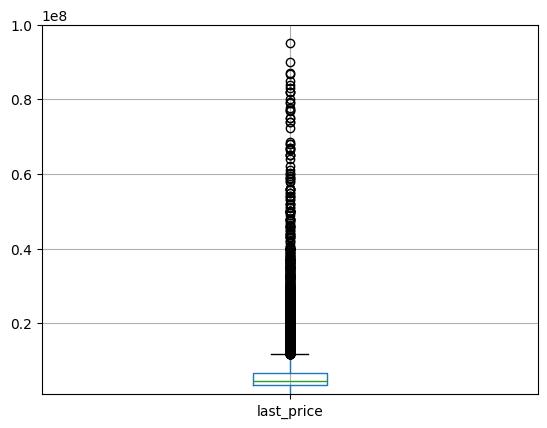

In [50]:
data.boxplot('last_price')
plt.ylim(1000000, 100000000);

In [51]:
data = data.query('last_price < 100000000')

На графике видно, что больше всего объектов стоят около 5 млн.руб. 

Объекты стоимостью выше 100 000 000 исключим из выборки.

**Количество комнат**


In [52]:
data['rooms'].describe()

count    21995.000000
mean         2.057604
std          1.040291
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

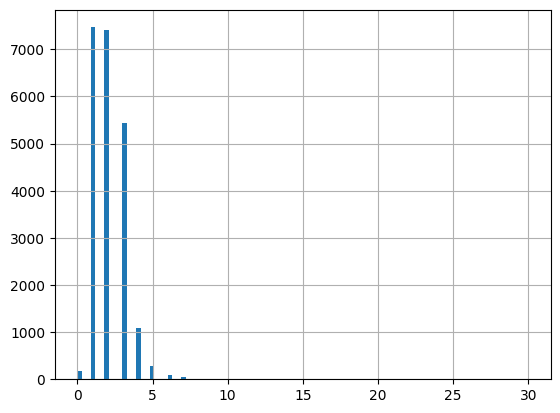

In [53]:
data['rooms'].hist(bins=100, range=(0, 30));

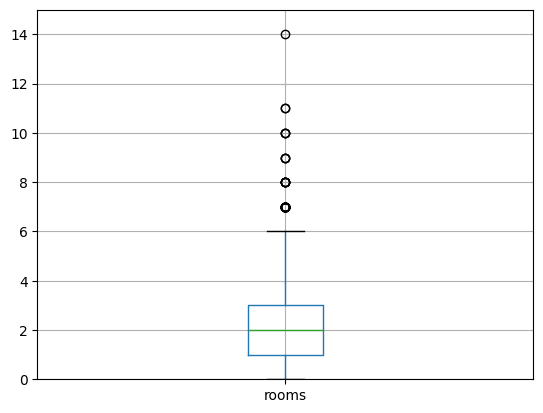

In [54]:
data.boxplot('rooms')
plt.ylim(0, 15);

In [55]:
print(data.groupby('rooms')['rooms'].count())
data = data.query('(rooms == 0 and open_plan == True) or (rooms > 0 and rooms < 10)')

rooms
0      181
1     7468
2     7413
3     5429
4     1086
5      277
6       85
7       40
8        6
9        3
10       3
11       2
14       1
16       1
Name: rooms, dtype: int64


Наиболее популярны одно- и двухкомнатные квартиры. 

С увеличением количества комнат количество объектов падает.

Выявили объекты, в которых количество комнат равно 0. Уберем эти квартиры из выборки, если это не открытая планировка.
Также исключим объекты с количеством комнат более 10. 

**Высота потолков**

In [56]:
data['ceiling_height'].describe()

count    21862.000000
mean         2.722791
std          0.998350
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

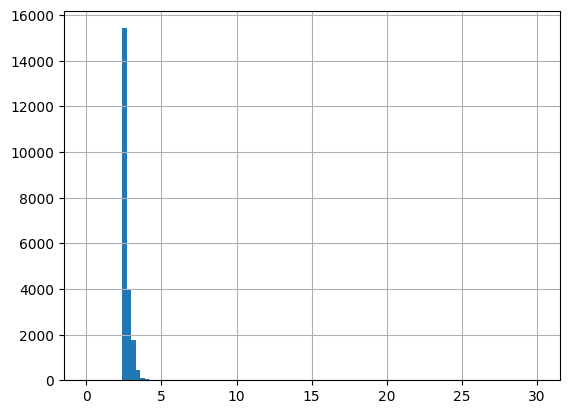

In [57]:
data['ceiling_height'].hist(bins=100, range=(0, 30));

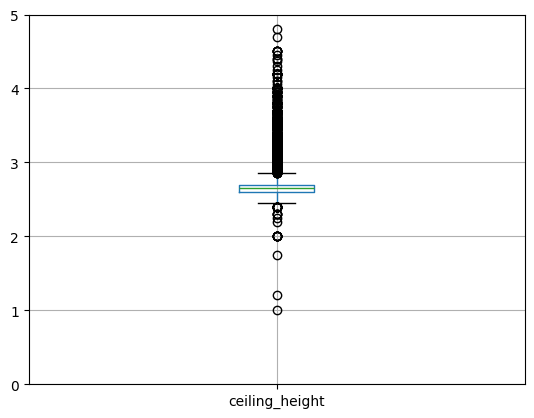

In [58]:
data.boxplot('ceiling_height')
plt.ylim(0, 5);

In [59]:
data['ceiling_height'].value_counts()
data = data.query('ceiling_height > 2 and ceiling_height < 8')

Больше всего объектов с высотой ~2.65 метров. 

С увеличением высотки потолков количество объектов уменьшается. 

Для некоторых объектов высота потолков указана значительно больше, чем медианная. Высота потолков ниже 2 метров и выше 8 кажется некорректной (даже, если при вводе данных были допущены опечатки (225 метров вместо 2,25 или т.п.), их количество не велико). Уберем их из выборки.

**Тип этажа квартиры**

In [60]:
data['floor_category'].describe()

count      21823
unique         3
top       другой
freq       16084
Name: floor_category, dtype: object

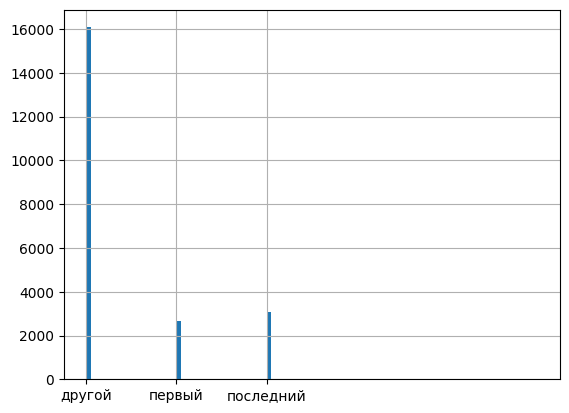

In [61]:
data['floor_category'].hist(bins=100, range=(0, 5));

Меньше всего продается объектов на первом и последнем этажах, что логично, т.к. "других" этажей в совокупности больше в домах. 

**Общее количество этажей в доме**

In [62]:
data['floors_total'].describe()

count    21823.000000
mean        10.658388
std          6.557642
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

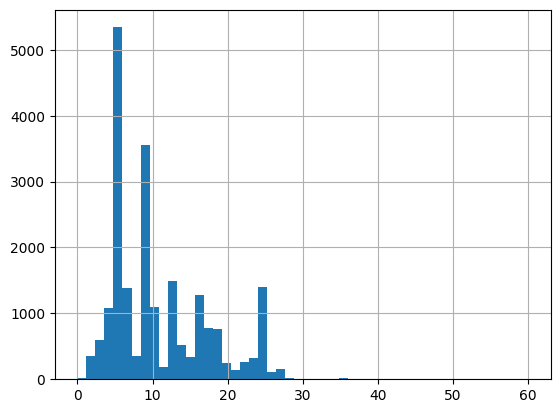

In [63]:
data['floors_total'].hist(bins=50, range=(0, 60));

Нет четкого распределения. 

Есть всплески на уровне 5-ти, 9-ти этажных домов, как наиболее часто встречающихся. 

**Расстояние до центра города в метрах**


In [64]:
data['city_centers_nearest'].describe()

count    16971.000000
mean     14314.137912
std       8679.165389
min        181.000000
25%       9422.500000
50%      13123.000000
75%      16343.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

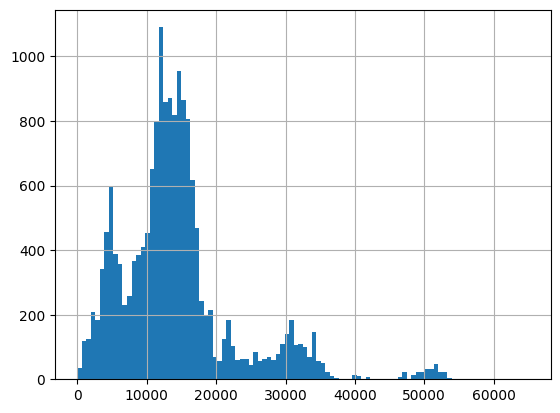

In [65]:
data['city_centers_nearest'].hist(bins=100, range=(0, 65000));

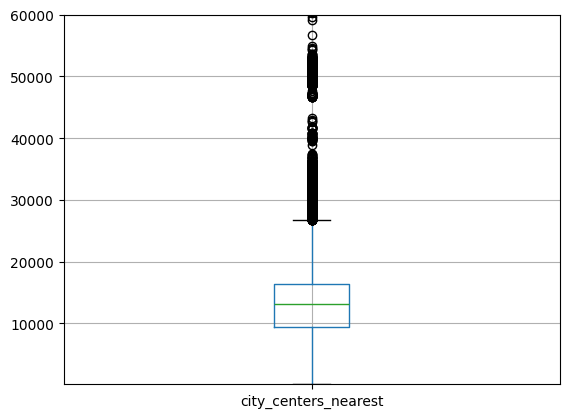

In [66]:
data.boxplot('city_centers_nearest')
plt.ylim(150, 60000);

Можно заметить несколько пиков (даже на расстоянии 50км), скорее всего распределены так: 
- первый пик - центр Санкт-Петербурга
- второй пик - окраина Санкт-Петебурга и ближайшие пригородные населенные пункты
- следующие всплески - населенные пункты Ленинградской области

**Расстояние до ближайшего парка**

In [67]:
data['parks_nearest'].describe()

count    7475.000000
mean      487.898328
std       337.475960
min         1.000000
25%       287.500000
50%       451.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

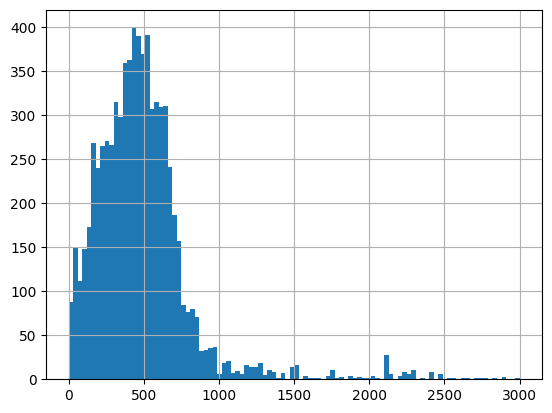

In [68]:
data['parks_nearest'].hist(bins=100, range=(0, 3000));

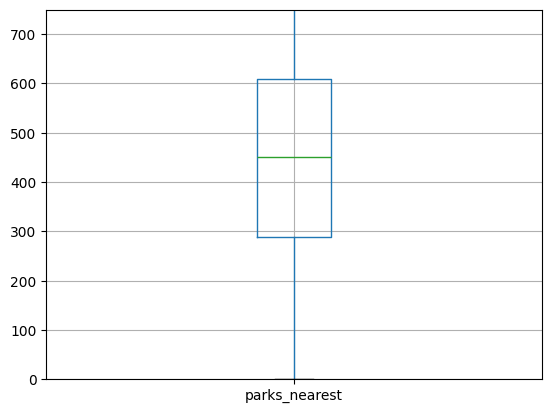

In [69]:
data.boxplot('parks_nearest')
plt.ylim(0, 750);

Распределение кажется ожидаемым. Очень много объектов, располагаемых рядом с парками. При этом, если парк находится далеко, скорее всего информацию об этом могли не указывать в объявлении (о чем нам говорят пропуски в данных).

#### Изучите, как быстро продавались квартиры

In [70]:
data['days_exposition'].describe()

count    18807.000000
mean       184.550487
std        221.424205
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

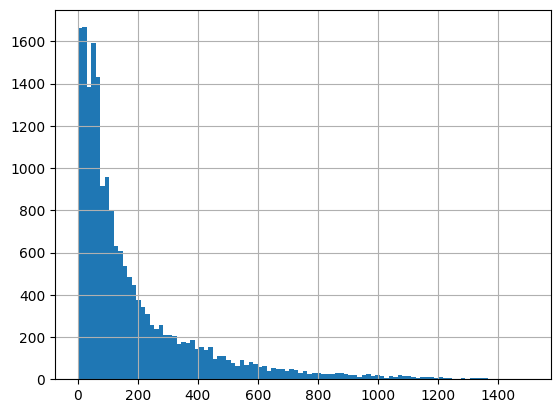

In [71]:
data['days_exposition'].hist(bins=100, range=(0, 1500));

**Вывод**

1. В среднем продажа занимает 184 дня. 
2. Но большинство объектов продаются в течении 101 дня. 
3. Быстрыми можно считать продажи менее 44 дней. 
4. Долгими можно считать продажи более 238 дня. 

#### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта       

**Общая площадь**

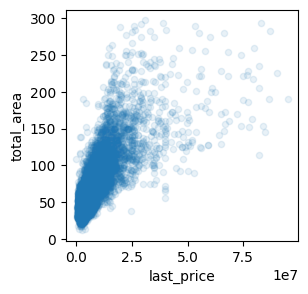

In [72]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1, figsize=(3, 3));

In [73]:
data['last_price'].corr(data['total_area'])

np.float64(0.7561678134666139)

Есть зависимость между стоимостью и общей площадью (чем больше площадь, тем выше стоимость).

**Жилая площадь**

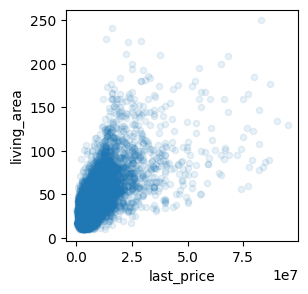

In [74]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1, figsize=(3, 3));

In [75]:
data['last_price'].corr(data['living_area'])

np.float64(0.6615655868760537)

Есть зависимость цены и жилой площади, но меньше, чем цены и общей площади.

**Площадь кухни**

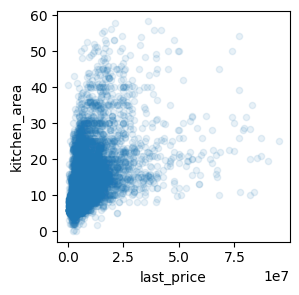

In [76]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1, figsize=(3, 3));

In [77]:
data['last_price'].corr(data['kitchen_area'])

np.float64(0.5278707891691192)

Есть зависимость цены и площади кухни (чем больше площадь кухни, тем выше цена), но не большая.

**Количество комнат**

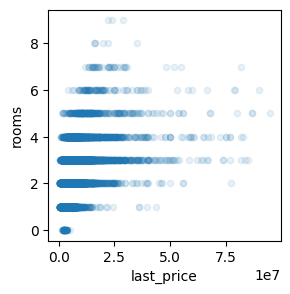

In [78]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1, figsize=(3, 3));

In [79]:
data['last_price'].corr(data['rooms'])

np.float64(0.4692879058510194)

Зависимость между ценой и количеством комнат есть, но не большая.

**Тип этажа, на котором расположена квартира**  

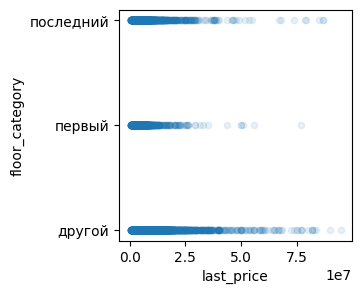

In [80]:
data.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.1, figsize=(3, 3));

Зависимость между ценой и категорией этажа отсутствует.

**Дата размещения (день недели, месяц, год)**

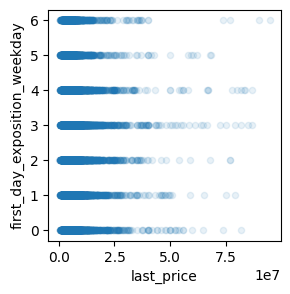

In [81]:
data.plot(x='last_price', y='first_day_exposition_weekday', kind='scatter', alpha=0.1, figsize=(3, 3));

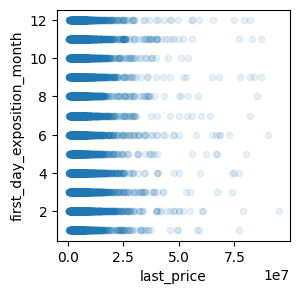

In [82]:
data.plot(x='last_price', y='first_day_exposition_month', kind='scatter', alpha=0.1, figsize=(3, 3));

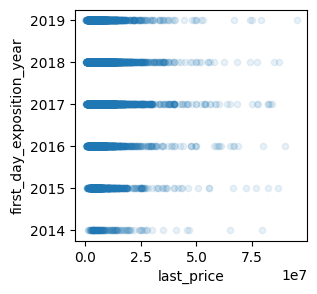

In [83]:
data.plot(x='last_price', y='first_day_exposition_year', kind='scatter', alpha=0.1, figsize=(3, 3));

In [84]:
data['last_price'].corr(data['first_day_exposition_weekday'])

np.float64(-0.008346997409021647)

In [85]:
data['last_price'].corr(data['first_day_exposition_month'])

np.float64(0.002927799445681118)

In [86]:
data['last_price'].corr(data['first_day_exposition_year'])

np.float64(-0.04559686650114882)

Зависимость между ценой и датой размещения объявления отсутствует.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [87]:
locality_names = data['locality_name'].value_counts().sort_values(ascending=False).head(10).index
df_locality_names = data.query('locality_name in @locality_names')
result = df_locality_names.pivot_table(index='locality_name', values='one_squere_meter_price', aggfunc='mean').sort_values(by='one_squere_meter_price', ascending=False)
result['one_squere_meter_price'] = result['one_squere_meter_price'].round(2)
result

,one_squere_meter_price
locality_name,
Санкт-Петербург,112825.43
Пушкин,103179.27
Кудрово,95533.83
Парголово,90444.88
Мурино,86011.84
Шушары,78621.58
Колпино,75307.10
Всеволожск,68824.06
Гатчина,68569.47


Самая высокая стоимость квадратного метра в Санкт-Петербурге.

Самая низкая стоимость квадратного метра в Выборге.

#### Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:

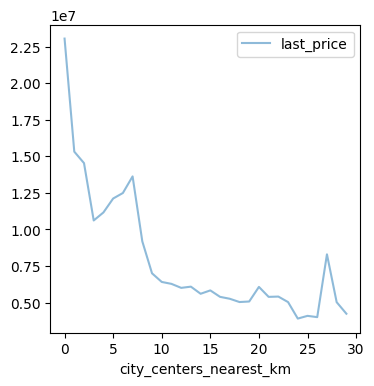

In [88]:
# Построим график взаимосвязи стоимости квартир в Санкт-Петебурге от их удаленности от центра
(
data
 .query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='city_centers_nearest_km', values=['last_price'], aggfunc='mean')
 .plot(alpha=0.5, figsize=(4, 4))
);

In [89]:
# Передадим срез данных в отдельную переменную, чтобы получить коэффициент корреляции Пирсона
spb_data = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values=['last_price'], aggfunc='mean').reset_index(drop=False)

In [90]:
spb_data['city_centers_nearest_km'].corr(spb_data['last_price'])

np.float64(-0.7875683592243705)

Для квартир из Санкт-Петерубрга выявлена корреляция цены и расстояния до центра города (чем больше расстояние от центра, тем меньше цена).

### Напишите общий вывод

1. Была выполнена предобработка данных:

    1.1. Работа с пропусками:
- заполнены пропуски в столбцах: ceiling_height, balcony, living_area, is_apartment, floors_total, parks_around_3000, ponds_around_3000
- частично исправлены пропуски в столбцах: airports_nearest, city_centers_nearest, kitchen_area
- исключены строки, в которых были пропущены значения в столбце locality_name
- были оставлены пропуски в столбцах:
	- days_exposition - сколько дней было размещено объявление (от публикации до снятия)
	- parks_nearest - расстояние до ближайшего парка    
	- ponds_nearest

    1.2. Корректировка типов данных

    1.3. Устранение дубликатов

    1.4. Для удобства анализа были добавлены следующие столбцы:

- цена одного квадратного метра
- день недели публикации объявления
- месяц публикации объявления
- год публикации объявления
- расстояние до центра города в километрах
- тип этажа квартиры

2. Были удалены строки, в которых:
- общая площадь превышает 300 кв.м
- жилая площадь менее 9 кв.м
- площадь кухни более 60 кв.м
- цена объекта выше 100 000 000 руб. 
- количество комнат более 10
- высота потолков менее 2 м и более 8 м

3. Было выявлено, что:
- в среднем продажа объектов занимает 184 дня
- большинство объектов продаются в течении 101 дня
- быстрыми можно считать продажи менее 44 дней
- долгими можно считать продажи более 238 дня

4. В большей степени на стоимость объектов влияют:
- общая площадь
- жилая площадь 
- площадь кухни

Не влияют (полностью или имеют минимальное влияние) на стоимость объекта:
- количество комнат
- тип этажа, на котором расположена квартира (первый, последний, другой)
- дата размещения (день недели, месяц, год)

5. Самая высокая стоимость квадратного метра в Санкт-Петербурге.
Самая низкая стоимость квадратного метра в Выборге.

6. Для квартир из Санкт-Петерубрга выявлена корреляция цены и расстояния до центра города (чем больше расстояние от центра, тем меньше цена)